## Importations


In [1]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt
#to get rid of import error of pandas_datareader
pd.core.common.is_list_like = pd.api.types.is_list_like

## Loading Tesla Stock Dataset

In [3]:
# Getting tesla historical stock data from yfinance
tesla_df = yf.download(tickers = "TSLA",
                     period = "max",
                     interval = "1d")

[*********************100%***********************]  1 of 1 completed


## Data Understanding

In [ ]:
tesla_df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


* Date (Index):The trading date (set as the index in the DataFrame).Each row corresponds to a single day's data.
* Open:The stock price at the start of the trading day.
* High:The highest stock price reached during the trading day.
* Low:The lowest stock price reached during the trading day.
* Close:The stock price at the end of the trading day.
* Adj Close (Adjusted Close):The closing price adjusted for corporate actions like stock splits, dividends, or rights offerings.It reflects the true value considering adjustments.
* Volume:The number of shares traded during the day.
Used to gauge market activity and sentiment.

In [ ]:
tesla_df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-11-18 00:00:00+00:00,338.739990,338.739990,348.549988,330.010010,340.730011,126547500
2024-11-19 00:00:00+00:00,346.000000,346.000000,347.380005,332.750000,335.760010,88852500
2024-11-20 00:00:00+00:00,342.029999,342.029999,346.600006,334.299988,345.000000,66340700
2024-11-21 00:00:00+00:00,339.640015,339.640015,347.989990,335.279999,343.809998,58011700
2024-11-22 00:00:00+00:00,352.559998,352.559998,361.529999,337.700012,341.089996,88896400


In [ ]:
tesla_df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
count,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3.627000e+03
mean,79.304475,79.304475,81.054636,77.472332,79.316776,9.674690e+07
std,104.540482,104.540482,106.926069,102.080397,104.597786,7.796164e+07
min,1.053333,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,11.957333,11.957333,12.289000,11.686666,11.966667,4.866805e+07
50%,17.806000,17.806000,18.063999,17.482668,17.774000,8.203590e+07
75%,175.279999,175.279999,179.285004,172.430000,175.019997,1.224836e+08
max,409.970001,409.970001,414.496674,405.666656,411.470001,9.140820e+08


* The mean price ($79.30) is much lower than the max price ($409.97), showing Tesla's tremendous growth over time.

* The large standard deviation of prices ($104.54) suggests Tesla's stock has been highly volatile, with major ups and downs.

* The median trading volume (~82M) indicates consistently high investor interest.


In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3627 entries, 2010-06-29 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  3627 non-null   float64
 1   (Close, TSLA)      3627 non-null   float64
 2   (High, TSLA)       3627 non-null   float64
 3   (Low, TSLA)        3627 non-null   float64
 4   (Open, TSLA)       3627 non-null   float64
 5   (Volume, TSLA)     3627 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 198.4 KB


In [4]:
# Flatten multi-level columns
tesla_df.columns = ["_".join(col).strip() for col in tesla_df.columns]

# Display the updated columns
print(tesla_df.columns)


Index(['Adj Close_TSLA', 'Close_TSLA', 'High_TSLA', 'Low_TSLA', 'Open_TSLA',
       'Volume_TSLA'],
      dtype='object')


In [5]:
# Rename flattened columns
tesla_df = tesla_df.rename(columns={
    "Adj Close_TSLA": "Adj Close",
    "Close_TSLA": "Close",
    "High_TSLA": "High",
    "Low_TSLA": "Low",
    "Open_TSLA": "Open",
    "Volume_TSLA": "Volume"
})



In [6]:
# Display the first few rows of the renamed DataFrame
tesla_df.head()


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-06-29 00:00:00+00:00,1.592667,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30 00:00:00+00:00,1.588667,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01 00:00:00+00:00,1.464000,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02 00:00:00+00:00,1.280000,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06 00:00:00+00:00,1.074000,1.074000,1.333333,1.055333,1.333333,103003500


## Exploratory Data Analysis

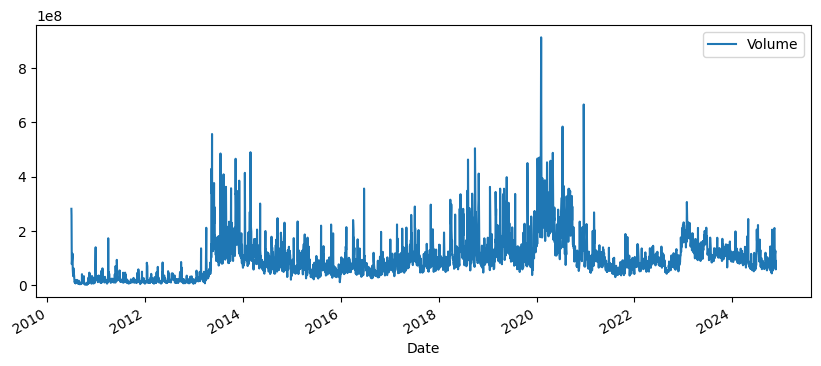

In [ ]:
# Now let's plot the total volume of stock being traded each day over the past
tesla_df['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

* There are noticeable spikes in trading activity, especially around 2020, possibly due to significant market events like Tesla's inclusion in the S&P 500 or stock splits.
* Around 2010-2013 the Trading volume was relatively low, reflecting Tesla's initial years as a publicly traded company when it was less known.
 In 2013-2019 there is a Gradual increases in volume likely correspond to Tesla gaining traction as a major player in the automotive and tech industries.
Post-2020 Stability:

* After the high volatility and volume in 2020, trading activity seems to have stabilized somewhat, albeit at levels higher than the early years.

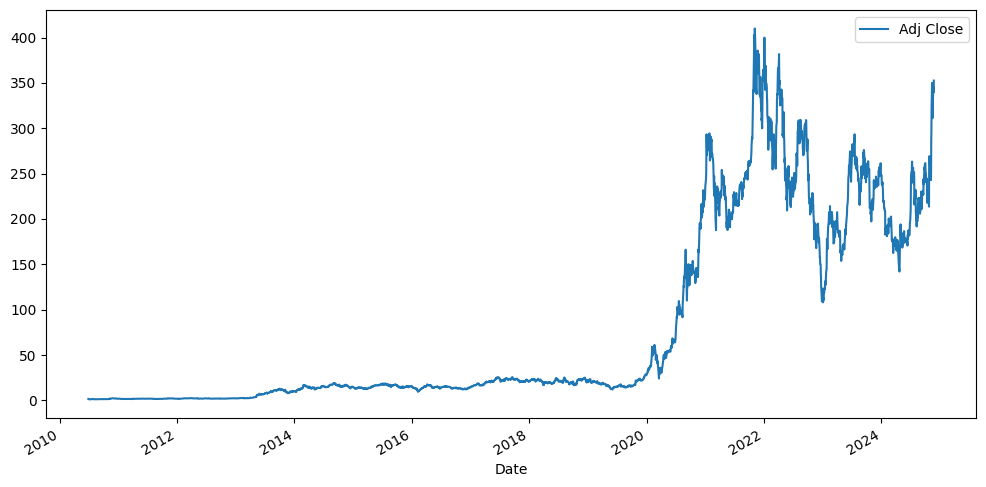

In [7]:
# Let's see a historical view of the closing price
tesla_df['Adj Close'].plot(legend=True, figsize = (12, 6))
plt.show()

For nearly a decade, Tesla's stock price showed relatively modest growth. This phase reflects Tesla's early-stage operations and the challenges of scaling an electric vehicle (EV) business. The adjusted closing prices started to increase as from 2020





In [ ]:
# filter on date (index)
tesla_df_filtered_from_2020 = tesla_df[tesla_df.index>='2020-01-01']
tesla_df_filtered_from_2024 = tesla_df[tesla_df.index>='2024-01-01']

<Axes: title={'center': 'Tesla price daily From 2020'}, xlabel='Date'>

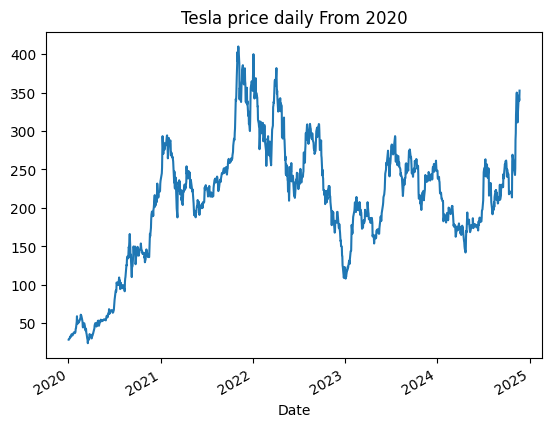

In [ ]:
# Chaining: select one column, draw a plot, of a type line
tesla_df_filtered_from_2020['Adj Close'].plot.line(title='Tesla price daily From 2020')

Around 2020, Tesla's adjusted closing prices started to increase. This likely due to:
* Increasing EV adoption.
* Tesla's profitability milestones (e.g., multiple quarters of profit).
* Inclusion in the S&P 500 Index.
The sharp increase suggests significant speculative interest.

High Volatility (2022-2024):

After reaching peak values, the stock experienced periods of sharp declines and recoveries. Key drivers could include:
* Macroeconomic factors like inflation, interest rate hikes, or supply chain issues.
* Tesla-specific challenges, such as increased competition or missed delivery targets.

<Axes: title={'center': 'Tesla price daily In 2024'}, xlabel='Date'>

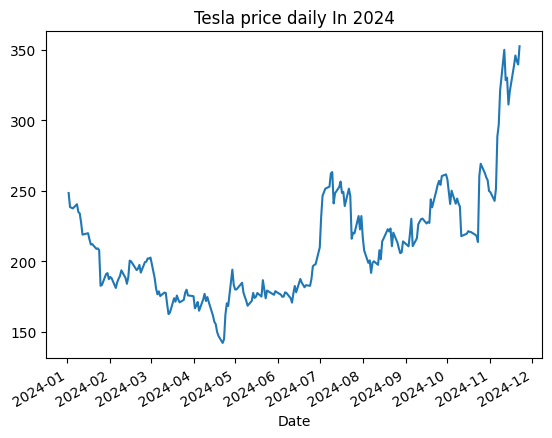

In [ ]:
# Closing prices in 2024
tesla_df_filtered_from_2024['Adj Close'].plot.line(title='Tesla price daily In 2024')

In 2024, the prices started by declining, at around July they started to increase, but then the trend declined again for about 3 months. In November, the prices started to increase which is the month elections were held.


```
# This is formatted as code
```





## Feature Engineering

In [ ]:
# generating new fields (using DateTime features):

tesla_df['Ticker'] = 'TSLA'
tesla_df['Year']= tesla_df.index.year
tesla_df['Month'] = tesla_df.index.month
tesla_df['Weekday'] = tesla_df.index.weekday
tesla_df['Date'] = tesla_df.index.date

In [ ]:
tesla_df.tail()

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date
Date,,,,,,,,,,,
2024-11-18 00:00:00+00:00,338.739990,338.739990,348.549988,330.010010,340.730011,126547500,TSLA,2024,11,0,2024-11-18
2024-11-19 00:00:00+00:00,346.000000,346.000000,347.380005,332.750000,335.760010,88852500,TSLA,2024,11,1,2024-11-19
2024-11-20 00:00:00+00:00,342.029999,342.029999,346.600006,334.299988,345.000000,66340700,TSLA,2024,11,2,2024-11-20
2024-11-21 00:00:00+00:00,339.640015,339.640015,347.989990,335.279999,343.809998,58011700,TSLA,2024,11,3,2024-11-21
2024-11-22 00:00:00+00:00,352.559998,352.559998,361.529999,337.700012,341.089996,88896400,TSLA,2024,11,4,2024-11-22


In [ ]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3627 entries, 2010-06-29 00:00:00+00:00 to 2024-11-22 00:00:00+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  3627 non-null   float64
 1   Close      3627 non-null   float64
 2   High       3627 non-null   float64
 3   Low        3627 non-null   float64
 4   Open       3627 non-null   float64
 5   Volume     3627 non-null   int64  
 6   Ticker     3627 non-null   object 
 7   Year       3627 non-null   int32  
 8   Month      3627 non-null   int32  
 9   Weekday    3627 non-null   int32  
 10  Date       3627 non-null   object 
dtypes: float64(5), int32(3), int64(1), object(2)
memory usage: 297.5+ KB


In [ ]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
tesla_df['adj_close_minus_1'] = tesla_df['Adj Close'].shift(-1)
tesla_df['adj_close_plus_1'] = tesla_df['Adj Close'].shift(1)

tesla_df.tail()

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1
Date,,,,,,,,,,,,,
2024-11-18 00:00:00+00:00,338.739990,338.739990,348.549988,330.010010,340.730011,126547500,TSLA,2024,11,0,2024-11-18,346.000000,320.720001
2024-11-19 00:00:00+00:00,346.000000,346.000000,347.380005,332.750000,335.760010,88852500,TSLA,2024,11,1,2024-11-19,342.029999,338.739990
2024-11-20 00:00:00+00:00,342.029999,342.029999,346.600006,334.299988,345.000000,66340700,TSLA,2024,11,2,2024-11-20,339.640015,346.000000
2024-11-21 00:00:00+00:00,339.640015,339.640015,347.989990,335.279999,343.809998,58011700,TSLA,2024,11,3,2024-11-21,352.559998,342.029999
2024-11-22 00:00:00+00:00,352.559998,352.559998,361.529999,337.700012,341.089996,88896400,TSLA,2024,11,4,2024-11-22,NaN,339.640015


In [ ]:
# Historical growth
tesla_df['growth_1d'] = tesla_df['Adj Close'] / tesla_df['Adj Close'].shift(1)  # 1-day growth
tesla_df['growth_30d'] = tesla_df['Adj Close'] / tesla_df['Adj Close'].shift(30)  # 30-day growth

# Future growth: for regression models
tesla_df['growth_future_1d'] = tesla_df['Adj Close'].shift(-1) / tesla_df['Adj Close']  # 1-day future growth

# Future growth: for binary models
tesla_df['is_positive_growth_1d_future'] = np.where(tesla_df['growth_future_1d'] > 1, 1, 0)  # Binary classification


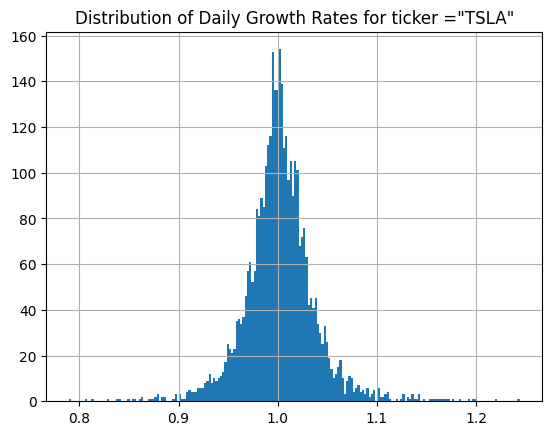

In [ ]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="TSLA"')
tesla_df.growth_1d.hist(bins=200)
plt.show()

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "TSLA"'}>

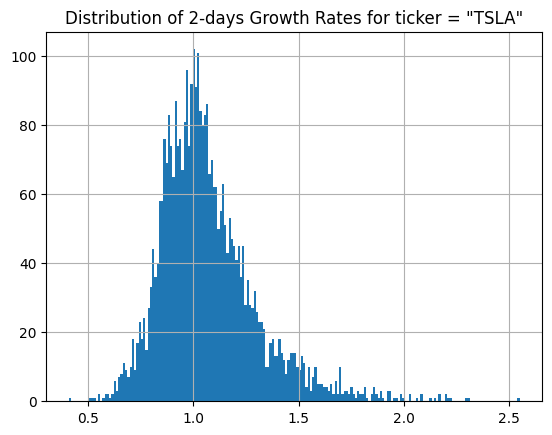

In [ ]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "TSLA"')

tesla_df.growth_30d.hist(bins=200)

In [ ]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in tesla_df.keys() if k.find('growth')>=0 or k=='Adj Close']
tesla_df[COLUMNS].tail()

,Adj Close,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,
2024-11-18 00:00:00+00:00,338.739990,1.056186,1.406552,1.021432,1
2024-11-19 00:00:00+00:00,346.000000,1.021432,1.415133,0.988526,0
2024-11-20 00:00:00+00:00,342.029999,0.988526,1.418917,0.993012,0
2024-11-21 00:00:00+00:00,339.640015,0.993012,1.422457,1.038040,1
2024-11-22 00:00:00+00:00,352.559998,1.038040,1.618733,NaN,0


In [ ]:
# Calculate the distribution if future growth
tesla_df.is_positive_growth_1d_future.value_counts() / len(tesla_df)

,count
is_positive_growth_1d_future,
1,0.516956
0,0.483044


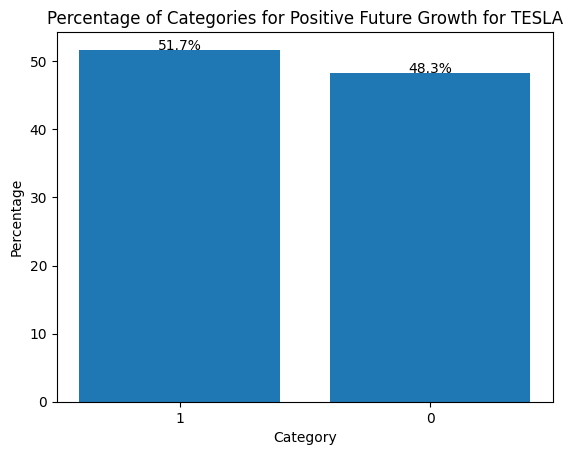

In [ ]:
# Calculate value counts
value_counts = tesla_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(tesla_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for TESLA')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

## Risk Analysis

In [ ]:
# Calculate daily returns
tesla_df['daily_return'] = tesla_df['Adj Close'].pct_change()

# Display basic statistics for daily returns
tesla_df['daily_return'].describe()


,daily_return
count,3626.000000
mean,0.002138
std,0.036121
min,-0.210628
25%,-0.016133
50%,0.001243
75%,0.019381
max,0.243951


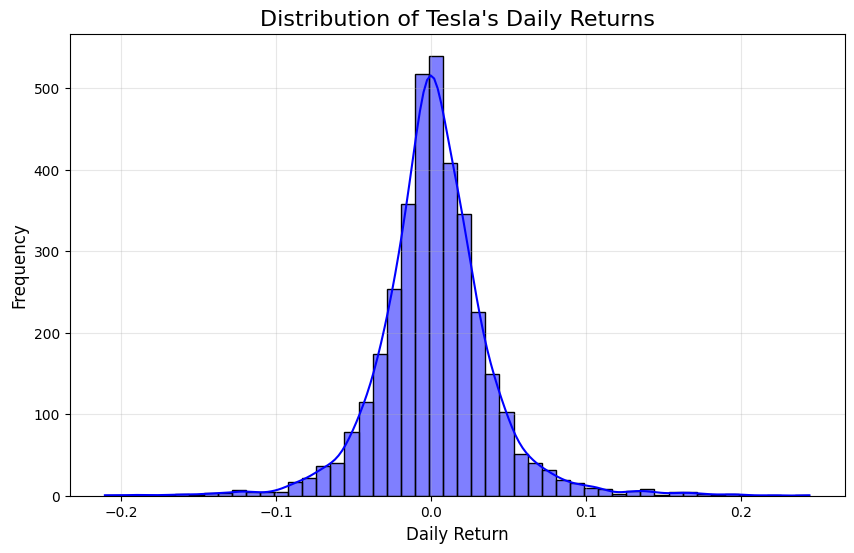

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of daily returns
plt.figure(figsize=(10, 6))
sns.histplot(tesla_df['daily_return'].dropna(), bins=50, kde=True, color='blue')
plt.title("Distribution of Tesla's Daily Returns", fontsize=16)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Calculate annualized volatility (assuming 252 trading days per year)
daily_volatility = tesla_df['daily_return'].std()
annualized_volatility = daily_volatility * (252 ** 0.5)

print(f"Daily Volatility: {daily_volatility:.4f}")
print(f"Annualized Volatility: {annualized_volatility:.4f}")


Daily Volatility: 0.0361
Annualized Volatility: 0.5734


## Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.
### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns.

<ipython-input-48-4ce21153f6b7>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




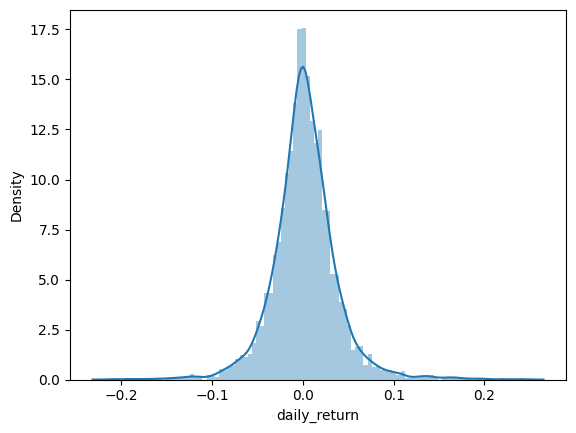

In [ ]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(tesla_df['daily_return'].dropna(), bins=100)
plt.show()

Now we can use quantile to get the risk value for the stock.



In [ ]:
# The 0.05 empirical quantile of daily returns
emp = tesla_df['Adj Close'].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at 1.688066792488098



The 0.05 empirical quantile of daily returns is at 1.688066792488098
The 0.05 empirical quantile of daily returns is at 1.688. A value of 1.688 means that in 5% of the trading days, Tesla’s return was worse than or equal to 1.688%. If we have a 1 million dollar investment, our one-day 5% VaR is 1.688066792488098 * 1,000,000 = $16,880.67\
on the worst 5% of days, we could lose $16,880.67 or more due to the daily volatility of Tesla's stock

Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

Firstly, for specifying a model, We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH) - past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation: GBM Equation

Where, S is the stock price, μ
 is the expected return (which we calculated earlier), σ
 is the standard deviation of the returns, t is time, and ϵ
 is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price. Now GBM Equation

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be. This is simply a way of scaling the standard deviation.

drift-shock

For more info on the Monte Carlo method for stocks, check out the following link: How to use Monte Carlo simulation with GBM

Secondly, to demonstrate a basic Monte Carlo method, we will start with just a few simulations.

In [ ]:
tesla_df = tesla_df.dropna()  # Drop rows with missing values


In [ ]:
# Set up our time
days = 365

# Now set delta t
deltaT = 1/days

# Calculate daily returns, drift (mu), and volatility (sigma)
daily_returns = tesla_df['Adj Close'].pct_change().dropna()
 # Drift (mean daily return)
mu = daily_returns.mean()
# Volatility (standard deviation of daily returns)
sigma = daily_returns.std()


Next, we will create a function that takes in the starting price and number of days, and uses the sigma and mu we have already calculated from our daily returns

In [ ]:
# Monte Carlo simulation function
def monte_carlo_simulation(start_price, days, mu, sigma):
    ''' This function takes in starting stock price, number of days of simulation, mu, sigma, and returns simulated price array'''

    # Define a price array
    price = np.zeros(days)
    price[0] = start_price

    # Shock and Drift arrays
    shock = np.zeros(days)
    drift = np.zeros(days)

    # Run price array for number of days
    for x in range(1, days):
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * deltaT, scale=sigma * np.sqrt(deltaT))
        # Calculate Drift
        drift[x] = mu * deltaT
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))

    return price

In [ ]:
tesla_df.head()

,Adj Close,Close,High,Low,Open,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future,daily_return,cumulative_return
Date,,,,,,,,,,,,,,,,,,,
2010-08-11 00:00:00+00:00,1.193333,1.193333,1.258667,1.190000,1.246000,11964000,TSLA,2010,8,2,2010-08-11,1.173333,1.268667,0.940620,0.749267,0.983240,0,-0.059380,0.749267
2010-08-12 00:00:00+00:00,1.173333,1.173333,1.193333,1.159333,1.186667,10365000,TSLA,2010,8,3,2010-08-12,1.221333,1.193333,0.983240,0.738564,1.040909,1,-0.016760,0.736710
2010-08-13 00:00:00+00:00,1.221333,1.221333,1.230000,1.177333,1.212000,9510000,TSLA,2010,8,4,2010-08-13,1.252000,1.173333,1.040909,0.834244,1.025109,1,0.040909,0.766848
2010-08-16 00:00:00+00:00,1.252000,1.252000,1.253333,1.217333,1.230000,7287000,TSLA,2010,8,0,2010-08-16,1.276667,1.221333,1.025109,0.978125,1.019702,1,0.025109,0.786103
2010-08-17 00:00:00+00:00,1.276667,1.276667,1.293333,1.252000,1.264000,6718500,TSLA,2010,8,1,2010-08-17,1.251333,1.252000,1.019702,1.188703,0.980156,0,0.019702,0.801591


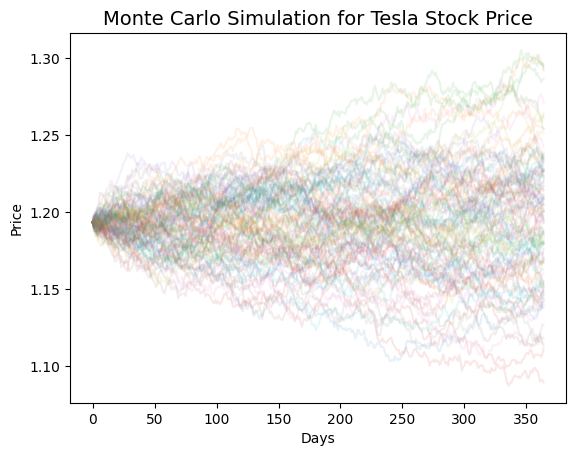

In [ ]:
# Get start price (e.g., stock opening price)
start_price = tesla_df['Adj Close'].iloc[0]  # Using the first 'Adj Close' price as the starting point

# Plot Monte Carlo simulations
for run in range(100):
    plt.plot(monte_carlo_simulation(start_price, days, mu, sigma), alpha=0.1)  # alpha for transparency

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Simulation for Tesla Stock Price', fontsize=14)
plt.show()

* There's noticeable variability across different runs, meaning that while the expected price is around $1.20, the actual future price could vary considerably.

* The majority of simulations show a trend toward higher prices, suggesting that the stock is likely to rise on average, but this is far from certain.

In [ ]:
# Set a large number of runs for the Monte Carlo simulations
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display the first 5 points to suppress large outputs
np.set_printoptions(threshold=5)

# Run the simulations
for run in range(runs):
    # Store the final stock price of the run in the simulations array
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days-1]

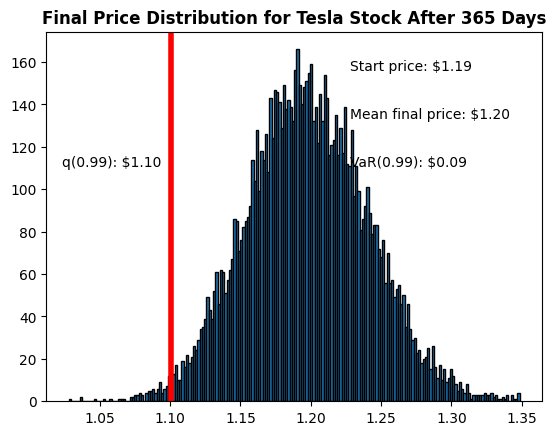

In [ ]:
# Calculate the 1% empirical quantile (VaR at the 99% confidence level)
q = np.percentile(simulations, 1)

# Plot the distribution of final simulated prices
plt.hist(simulations, bins=200, edgecolor='black')

# Add additional information to the plot
plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))  # VaR at 99% confidence
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a red vertical line at the 1% quantile (VaR)
plt.axvline(x=q, linewidth=4, color='r')

# Title of the plot
plt.title(f"Final Price Distribution for Tesla Stock After {days} Days", weight='bold')

# Show the plot
plt.show()


The histogram shows the distribution of final stock prices after 365 days across all simulation runs. The prices are mostly clustered between 1.05 and 1.25, with a peak around 1.15–1.20. This suggests that the stock has a high probability of remaining close to its starting price, with some potential upside (beyond 1.25) and a small chance of downside (below 1.05).
Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the tesla stock, which looks to be 0.09 dollar for every investment of 1.19 dollar (the price of one inital Tesla stock).

This means for every initial stock you purchase, you are putting about $ 0.09 at risk 99% of the time from our Monte Carlo Simulation.